In [1]:
from google.colab import drive
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Directories
train_folder = '/content/drive/MyDrive/Welding_Dataset/training'
test_folder = '/content/drive/MyDrive/Welding_Dataset/testing'

# Image properties
img_size = (28, 28)
samples_per_class = 4000
batch_size = 32

def load_random_samples_from_directory(directory, samples_per_class, img_size):
    # Initialize containers for images and labels
    X_data, y_data = [], []
    class_names = sorted(os.listdir(directory))
    print(class_names)
    class_indices = {class_name: i for i, class_name in enumerate(class_names)}
    print(class_indices)

    # Loop through each class directory and pick random samples
    count = 0
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        all_images = os.listdir(class_dir)
        random.shuffle(all_images)
        selected_images = all_images[:samples_per_class]

        for img_file in selected_images:
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Normalize the image
            X_data.append(img_array)
            y_data.append(class_indices[class_name])
            count+=1
            print(count)

    # Convert lists to NumPy arrays
    X_data = np.array(X_data)
    y_data = tf.keras.utils.to_categorical(np.array(y_data), num_classes=len(class_names))

    return X_data, y_data

# Load a random subset of images from each training class
X_train, y_train = load_random_samples_from_directory(train_folder, samples_per_class, img_size)



Streaming output truncated to the last 5000 lines.
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983

['Crack', 'LackOfPenetration', 'NoDefect', 'Porosity']
{'Crack': 0, 'LackOfPenetration': 1, 'NoDefect': 2, 'Porosity': 3}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
24

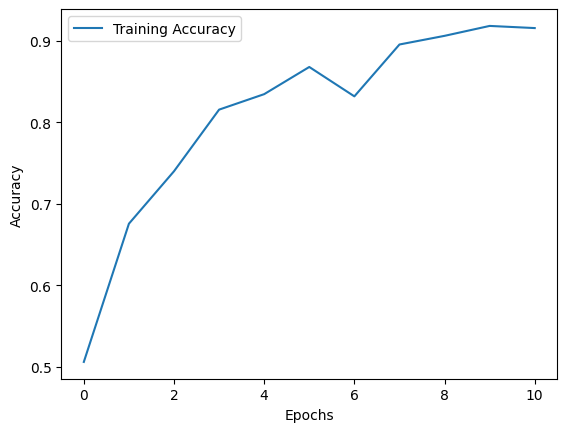

62/62 [==============================] - 1s 7ms/step - loss: 0.1898 - accuracy: 0.9369
Test Accuracy: 0.94


In [2]:
samples_per_test_class = 512
X_test, y_test = load_random_samples_from_directory(test_folder, samples_per_test_class, img_size)

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=11)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

